In [1]:
import pandas as pd

from settings import key
from datetime import datetime


In [2]:
coords = []

with open("server.log", "r") as f:
    while line := f.readline():
        if '/api/v1/forecast/cities?lat=' in line:
            coords.append([
                str(float(line.split("=")[1].split("&")[0])), # lat
                str(float(line.split("=")[2].split("&")[0].split(" ")[0])), # lon
                datetime.strptime(line.split(",")[0][1:], '%Y-%m-%d %H:%M:%S'), # time
            ])


In [3]:
df = pd.DataFrame(coords)


In [4]:
df

,0,1,2
0,56.99167,24.30306,2024-10-30 21:22:50
1,56.99167,24.30306,2024-10-30 21:22:53
2,56.99167,24.30306,2024-10-30 21:22:54
3,56.99167,24.30306,2024-10-30 21:22:55
4,56.99167,24.30306,2024-10-30 21:22:55
...,...,...,...
59385,56.9549560546875,24.18711280822754,2024-12-10 15:38:55
59386,56.9549560546875,24.18711280822754,2024-12-10 15:38:55
59387,56.9549560546875,24.18711280822754,2024-12-10 15:38:55
59388,56.9735492,24.1328442,2024-12-10 15:47:31


In [5]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [6]:
df["date_h"] = df[2].apply(lambda r: r.strftime("%Y-%m-%d %H"))

In [7]:
df

,0,1,2,date_h
0,56.99167,24.30306,2024-10-30 21:22:50,2024-10-30 21
1,56.99167,24.30306,2024-10-30 21:22:53,2024-10-30 21
2,56.99167,24.30306,2024-10-30 21:22:54,2024-10-30 21
3,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
4,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
...,...,...,...,...
59385,56.9549560546875,24.18711280822754,2024-12-10 15:38:55,2024-12-10 15
59386,56.9549560546875,24.18711280822754,2024-12-10 15:38:55,2024-12-10 15
59387,56.9549560546875,24.18711280822754,2024-12-10 15:38:55,2024-12-10 15
59388,56.9735492,24.1328442,2024-12-10 15:47:31,2024-12-10 15


In [8]:
df_h = pd.DataFrame(df.groupby("date_h").count()[1]/3)

<Axes: xlabel='date_h'>

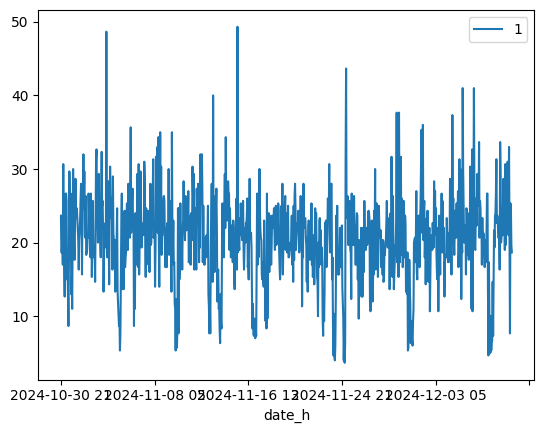

In [9]:
df_h.plot()

In [10]:
from sklearn import linear_model


In [11]:
reg = linear_model.LinearRegression()


In [12]:
import numpy as np


In [13]:
df_h_vals = df_h[1].values.reshape(-1, 1)
df_h_ct = np.array(range(len(df_h_vals))).reshape(-1, 1)


In [14]:
reg.fit(df_h_ct, df_h_vals)


LinearRegression()

In [15]:
import matplotlib.pyplot as plt


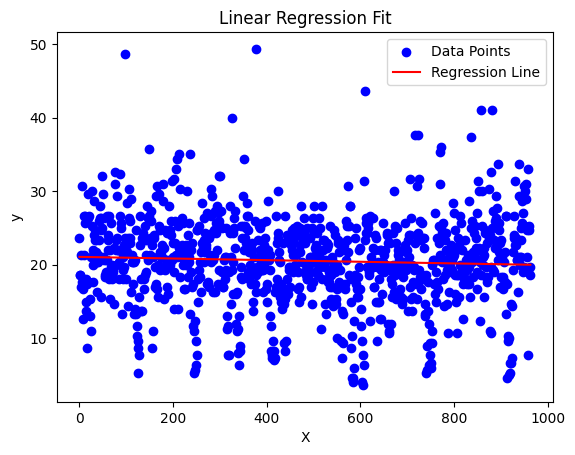

In [16]:
y_pred = reg.predict(df_h_ct)
plt.scatter(df_h_ct, df_h_vals, color='blue', label='Data Points')
plt.plot(df_h_ct, y_pred, color='red', label='Regression Line')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")

plt.show()

In [17]:
y_pred

array([[21.06995177],
       [21.06884276],
       [21.06773374],
       [21.06662473],
       [21.06551571],
       [21.0644067 ],
       [21.06329768],
       [21.06218867],
       [21.06107965],
       [21.05997064],
       [21.05886162],
       [21.05775261],
       [21.0566436 ],
       [21.05553458],
       [21.05442557],
       [21.05331655],
       [21.05220754],
       [21.05109852],
       [21.04998951],
       [21.04888049],
       [21.04777148],
       [21.04666246],
       [21.04555345],
       [21.04444444],
       [21.04333542],
       [21.04222641],
       [21.04111739],
       [21.04000838],
       [21.03889936],
       [21.03779035],
       [21.03668133],
       [21.03557232],
       [21.0344633 ],
       [21.03335429],
       [21.03224528],
       [21.03113626],
       [21.03002725],
       [21.02891823],
       [21.02780922],
       [21.0267002 ],
       [21.02559119],
       [21.02448217],
       [21.02337316],
       [21.02226414],
       [21.02115513],
       [21